In [110]:
import pandas as pd
import matplotlib.pyplot as mtplt
import seaborn as sb
color = sb.color_palette()
%matplotlib inline

In [111]:
PlayerImpract_DF = pd.read_csv("./Data/nba_2017_pie.csv")
PlayerImpract_DF.head()


,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [112]:
# With 82 games in the regular season, MVP candidate should have played around 75% of games
PlayerImpract_DF = PlayerImpract_DF[(PlayerImpract_DF['GP'] > 60)]
# In Steph Currys and James Harden's MVP seasons they approached 3000 minutes,
# but played almost every game, therefore around 2000 minutes is reasonable for 60 games
PlayerImpract_DF = PlayerImpract_DF[(PlayerImpract_DF['MIN'] > 30)]
# The avg player impact/efficiency rating is 15, so lets filter accordingly
PlayerImpract_DF = PlayerImpract_DF[(PlayerImpract_DF['PIE'] > 15)]
PlayerImpract_DF

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0
5,Kevin Durant,GSW,28,62,51,11,33.4,117.2,101.3,16.0,...,18.4,2.3,23.2,13.7,8.5,59.4,65.1,27.6,103.71,18.6
6,LeBron James,CLE,32,74,51,23,37.8,114.9,107.1,7.7,...,25.6,4.0,20.9,12.7,12.0,59.4,61.9,29.7,98.38,18.3
7,Chris Paul,LAC,32,61,43,18,31.5,116.2,101.3,14.9,...,35.0,2.5,14.9,8.9,9.1,55.5,61.4,24.3,98.19,18.2
8,DeMarcus Cousins,NOP,26,72,30,42,34.2,106.7,109.0,-2.2,...,14.3,7.2,30.5,18.8,11.6,49.8,56.2,36.4,97.11,17.8
9,Giannis Antetokounmpo,MIL,22,80,42,38,35.6,107.4,105.9,1.5,...,19.8,5.8,22.6,14.3,10.7,54.1,59.9,28.3,96.46,17.6
10,Kawhi Leonard,SAS,26,74,54,20,33.4,112.6,104.0,8.6,...,13.3,3.8,16.0,10.0,7.9,54.1,61.0,31.2,95.79,17.4
12,Karl-Anthony Towns,MIN,21,82,31,51,37.0,109.9,110.8,-0.9,...,10.5,11.4,27.7,19.5,10.1,57.6,61.8,27.4,97.10,17.1


In [113]:
# Social Media Influence
PlayerTwitter_DF = pd.read_csv("./Data/nba_2017_twitter_players.csv")
PlayerTwitter_DF.head()

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [125]:
PlayerImpract_DF = PlayerImpract_DF.merge(PlayerTwitter_DF, how='inner', on='PLAYER')
PlayerImpract_DF.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,TS%,USG%,PACE,PIE,TWITTER_FAVORITE_COUNT_x,TWITTER_RETWEET_COUNT_x,TWITTER_FAVORITE_COUNT_y,TWITTER_RETWEET_COUNT_y,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,55.4,40.8,102.31,23.0,2130.5,559.0,2130.5,559.0,2130.5,559.0
1,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,58.0,32.6,100.19,19.2,368.0,104.0,368.0,104.0,368.0,104.0
2,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,61.3,34.1,102.98,19.0,969.0,321.5,969.0,321.5,969.0,321.5
3,Kevin Durant,GSW,28,62,51,11,33.4,117.2,101.3,16.0,...,65.1,27.6,103.71,18.6,1425.5,366.0,1425.5,366.0,1425.5,366.0
4,LeBron James,CLE,32,74,51,23,37.8,114.9,107.1,7.7,...,61.9,29.7,98.38,18.3,5533.5,1501.5,5533.5,1501.5,5533.5,1501.5


In [115]:
# Real Plus Minus rates the performance of the player based on 
# the real impact he makes when on the court and when not
# taking into account opponents
PM_DF = pd.read_csv("./Data/nba_2017_real_plus_minus.csv")
PM_DF = PM_DF[(PM_DF['GP'] > 60)]
PM_DF = PM_DF[(PM_DF['MPG'] > 30)]
PM_DF.rename(columns={"NAME":"PLAYER", "WINS": "WINS_RPM"}, inplace=True)
PLAYERS = []
for p in PM_DF["PLAYER"]:
    pl, pos = p.split(",")
    PLAYERS.append(pl)
PM_DF.drop(["PLAYER"], inplace=True, axis=1) 
PM_DF.insert(loc=0, column="PLAYER", value=PLAYERS)
PM_DF.head()


,PLAYER,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM
0,LeBron James,CLE,74,37.8,6.49,1.93,8.42,20.43
1,Stephen Curry,GS,79,33.4,7.27,0.14,7.41,18.80
2,Jimmy Butler,CHI,76,37.0,4.82,1.80,6.62,17.35
3,Russell Westbrook,OKC,81,34.6,6.74,-0.47,6.27,17.34
4,Draymond Green,GS,76,32.5,1.55,5.59,7.14,16.84


In [116]:
# Now for more detailed in game stats
# In a better version, I would use these stats more instead of the RPM and PIE

BR_DF = pd.read_csv("./Data/nba_2017_br.csv")
BR_DF = BR_DF[(BR_DF['G'] > 60)]
BR_DF = BR_DF[(BR_DF['MP'] > 30)]
BR_DF.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [117]:
MVP_Picks_DF = BR_DF.copy()
MVP_Picks_DF.rename(columns={'Player': 'PLAYER','Pos':'POSITION', 'Tm': "TEAM", 'Age': 'AGE', 'TRB': 'REB', "PS/G": "PPG"}, inplace=True)
MVP_Picks_DF.drop(["Rk","G", "GS", "TEAM", "POSITION", "AGE", "2P", "2PA", "2P%","3P", "3PA", "3P%", "eFG%","PF", "ORB", "DRB"], inplace=True, axis=1)
MVP_Picks_DF = MVP_Picks_DF.merge(PM_DF, how="inner" , on="PLAYER")
MVP_Picks_DF.head()

,PLAYER,MP,FG,FGA,FG%,FT,FTA,FT%,REB,AST,...,BLK,TOV,PPG,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM
0,Russell Westbrook,34.6,10.2,24.0,0.425,8.8,10.4,0.845,10.7,10.4,...,0.4,5.4,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34
1,James Harden,36.4,8.3,18.9,0.440,9.2,10.9,0.847,8.1,11.2,...,0.5,5.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54
2,Isaiah Thomas,33.8,9.0,19.4,0.463,7.8,8.5,0.909,2.7,5.9,...,0.2,2.8,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19
3,Anthony Davis,36.1,10.3,20.3,0.505,6.9,8.6,0.802,11.8,2.1,...,2.2,2.4,28.0,NO,75,36.1,0.45,3.90,4.35,12.81
4,DeMar DeRozan,35.4,9.7,20.9,0.467,7.4,8.7,0.842,5.2,3.9,...,0.2,2.4,27.3,TOR,74,35.4,2.21,-2.04,0.17,5.46


In [118]:
PlayerImpract_DF_Imp = PlayerImpract_DF[["PLAYER", "NETRTG", "AST%", "AST/TO","REB%", "USG%", "TS%", "W", "TWITTER_FAVORITE_COUNT", "TWITTER_RETWEET_COUNT"]].copy()
MVP_Picks_DF = MVP_Picks_DF.merge(PlayerImpract_DF_Imp, how="inner" , on="PLAYER")
MVP_Picks_DF.head()

,PLAYER,MP,FG,FGA,FG%,FT,FTA,FT%,REB,AST,...,WINS_RPM,NETRTG,AST%,AST/TO,REB%,USG%,TS%,W,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,34.6,10.2,24.0,0.425,8.8,10.4,0.845,10.7,10.4,...,17.34,3.3,54.3,1.92,16.7,40.8,55.4,46,2130.5,559.0
1,James Harden,36.4,8.3,18.9,0.440,9.2,10.9,0.847,8.1,11.2,...,15.54,6.3,50.5,1.95,12.3,34.1,61.3,54,969.0,321.5
2,Isaiah Thomas,33.8,9.0,19.4,0.463,7.8,8.5,0.909,2.7,5.9,...,8.19,5.0,30.5,2.13,4.5,33.7,62.5,51,467.5,155.5
3,Anthony Davis,36.1,10.3,20.3,0.505,6.9,8.6,0.802,11.8,2.1,...,12.81,1.7,11.0,0.87,17.0,32.6,58.0,31,368.0,104.0
4,DeMar DeRozan,35.4,9.7,20.9,0.467,7.4,8.7,0.842,5.2,3.9,...,5.46,3.3,20.4,1.61,8.3,34.2,55.2,47,0.0,186.0


In [119]:
# This implies Russell Westbrook would be the MVP for 2017, which he was! 
# Now it's time to see the stats that are most correlated to Wins

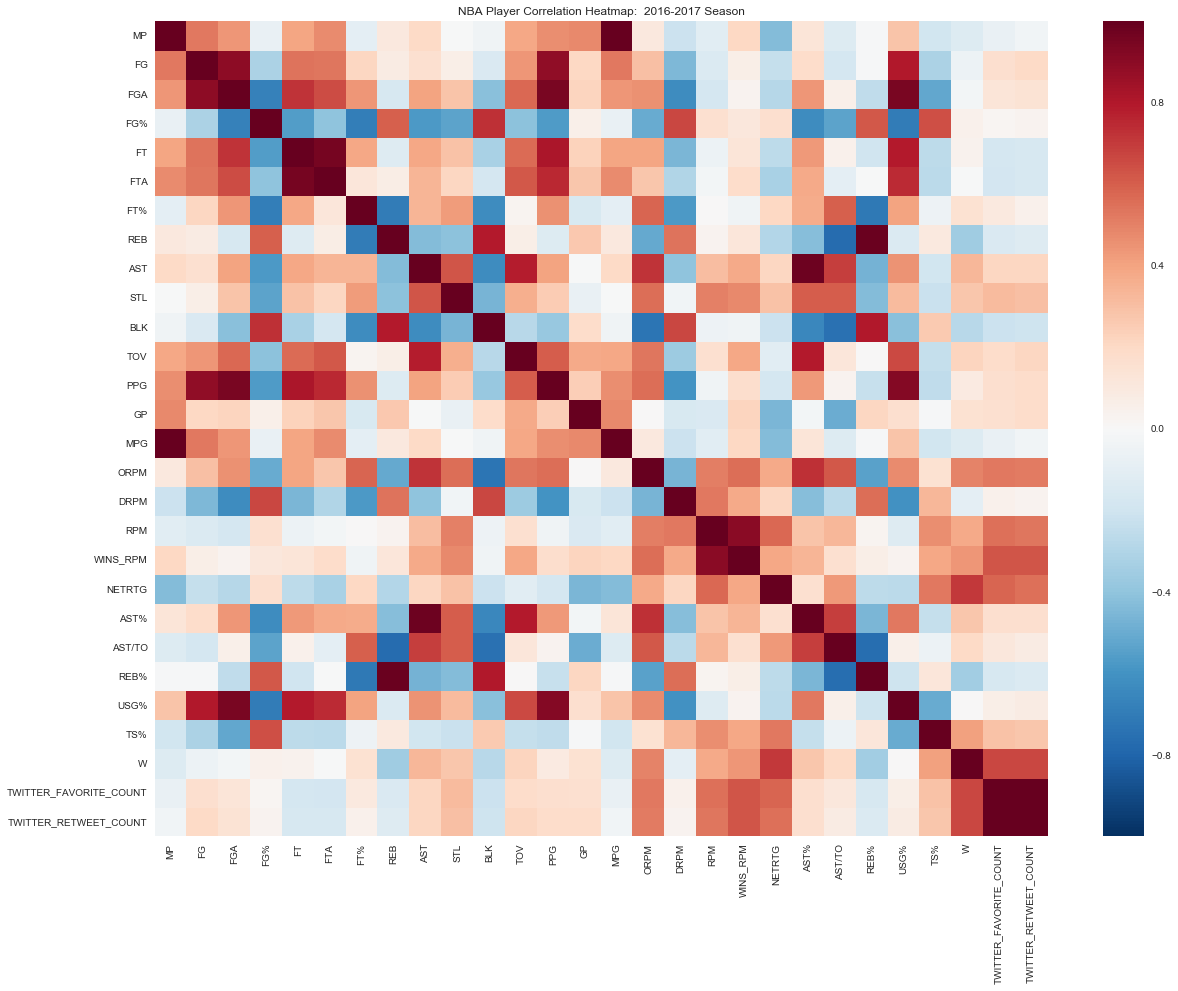

In [120]:
mtplt.subplots(figsize=(20,15))
ax = mtplt.axes()
ax.set_title("NBA Player Correlation Heatmap:  2016-2017 Season")
corr = MVP_Picks_DF.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [121]:
# We can see that Wins are most correlated with NETRTG, which is not the greatest measure, and Twitter activity!! 

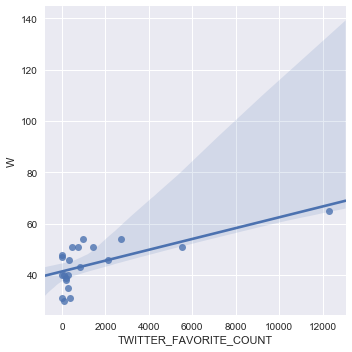

In [122]:
sb.lmplot(x="TWITTER_FAVORITE_COUNT", y="W", data=MVP_Picks_DF)


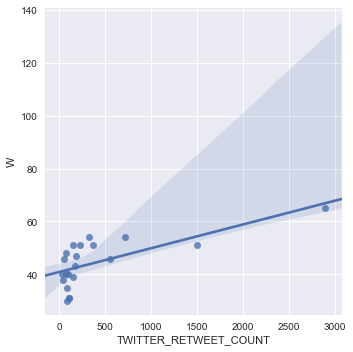

In [123]:
sb.lmplot(x="TWITTER_RETWEET_COUNT", y="W", data=MVP_Picks_DF)